In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
import re
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
stops = set(stopwords.words('english'))
from nltk.stem.porter import PorterStemmer
p_stemmer = PorterStemmer()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV 
%matplotlib inline

In [2]:
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Import the combined Liberal and Conservative datasets for training the algorythem

In [5]:
df=pd.read_csv('LibCon03-06-2018.csv')

df.shape

(3842, 18)

In [6]:
df['sent_label'] = 'neutral'
df.loc[df['sentiment'] > 0.1, 'sent_label'] = 'positive'
df.loc[df['sentiment'] < -0.1, 'sent_label'] = 'negative'
df.head(3)
    

,body,comms_num,created,domain,id,score,subreddit,time_retrieved,title,time,time_retrieved.1,post_duration,time_hm,day,word_count,sent_sia,sentiment,subjectivity,sent_label
0,NaN,1,1.527722e+09,medium.com,8n9e7d,1,Conservative,2018-05-30 22:07:10.938189+00:00,The Day I Learned We Had a Fake News Problem,2018-05-30 23:17:28.000000,2018-05-30 22:07:10.938189,23.0,23,Sun,10,-0.38,-0.50,1.00,negative
1,NaN,0,1.527281e+09,medium.com,8m1ean,8,Conservative,2018-05-30 22:07:10.938189+00:00,Jordan Peterson LBC Interview: A Few Highlights,2018-05-25 20:35:45.000000,2018-05-30 22:07:10.938189,2.0,20,Sun,7,-0.48,-0.20,0.10,negative
2,NaN,0,1.527121e+09,thefederalist.com,8lko53,7,Conservative,2018-05-30 22:07:10.938189+00:00,James Clapper Just Lied Again About His Previo...,2018-05-24 00:21:14.000000,2018-05-30 22:07:10.938189,22.0,0,Sun,12,0.59,-0.17,0.17,negative


In [7]:
df_Lib=df[df['subreddit']=='Liberal'] 
df_Con=df[df['subreddit']=='Conservative']

In [1]:
# important to represent domains from both sides as conservative use less websites 
Lib_news= df_Lib['domain'].value_counts().head(15).index.tolist() 
Con_news= df_Con['domain'].value_counts().head(15).index.tolist() 

# df['domain_d'] = [type_ if type_ in DD
#                       else "OTHER" for type_ in df['domain']]

# df['domain_d'].value_counts()
News_Comm=list(set(Con_news+Lib_news))
df['domain_d'] = [type_ if type_ in News_Comm
                      else "OTHER" for type_ in df['domain']]

df['domain_d'].value_counts()

NameError: name 'df_Lib' is not defined

In [9]:
cat_features = df.select_dtypes(include = ["object"]).columns
num_features = df.select_dtypes(exclude = ["object"]).columns
df_num = df[num_features]
df_cat = df[cat_features]
print("Numerical features : " + str(len(num_features)))
print(df.select_dtypes(exclude=['O']).columns.values)
print("Categorical features : " + str(len(cat_features)))
print((df.select_dtypes(include=['O']).columns.values))
# train_num = train[numerical_features]
# train_cat = train[categorical_features]

Numerical features : 9
['comms_num' 'created' 'score' 'post_duration' 'time_hm' 'word_count'
 'sent_sia' 'sentiment' 'subjectivity']
Categorical features : 11
['body' 'domain' 'id' 'subreddit' 'time_retrieved' 'title' 'time'
 'time_retrieved.1' 'day' 'sent_label' 'domain_d']


In [10]:
print('Scores')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.score),np.median(df.score)))
print('Number of coments')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.comms_num),np.median(df.comms_num)))



Scores
Mean is 487.85 and the Median is 147.00
Number of coments
Mean is 79.30 and the Median is 14.00


### NLP

In [11]:
df['text']=df['title'].str.replace('\d+', '')
# df_lib_con.title = df_lib_con.title.str.replace('\d+', '')

In [12]:
def process_lem(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    tokens = word_tokenize(text)
    
    lemmer = WordNetLemmatizer()
    stop_words = stopwords.words("english")
    return ' '.join([lemmer.lemmatize(word) for word in tokens if not word in stop_words])

In [13]:
df['text'] = [process_lem(text) for text in df['text']]

In [14]:

le=LabelEncoder()
# X = df['domain_d']
X = df[['word_count','sentiment','domain_d','title','post_duration','text']]
# y=df_combined['subreddit']
# transform the label 
y = le.fit_transform(df['subreddit'])
# y_cm = LabelEncoder().fit_transform(df['comments_label'])

In [15]:
df.subreddit.value_counts()

Conservative    2184
Liberal         1658
Name: subreddit, dtype: int64

In [16]:
y.sum()

1658

In [17]:
X_d = pd.get_dummies(X, columns=['domain_d'], drop_first=True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_d, y, test_size=0.5, random_state=42)


In [19]:
tvec = TfidfVectorizer(stop_words=stopwords.words('english'),
                                 lowercase=True,max_features=500)

X_train_matrix = tvec.fit_transform(X_train['text'])
X_test_matrix = tvec.transform(X_test['text'])

In [47]:
X_train_df = pd.DataFrame(X_train_matrix.todense(),
                         columns=tvec.get_feature_names(),
                         index=X_train.index)

In [48]:
X_test_df = pd.DataFrame(X_test_matrix.todense(),
                        columns=tvec.get_feature_names(),
                        index=X_test.index)

In [50]:
X_train_all = pd.concat([X_train_df, X_train.drop('title', axis=1)], axis=1)
X_test_all = pd.concat([X_test_df, X_test.drop('title', axis=1)], axis=1)

In [20]:
forest = RandomForestClassifier(max_depth=10, n_estimators=5)
lr=LogisticRegression()

Prediction based just on NLP

In [21]:
lr.fit(X_train_matrix, y_train)
print('Log Reg')
print(lr.score(X_train_matrix, y_train))
print(lr.score(X_test_matrix, y_test))

forest.fit(X_train_matrix, y_train)
print('\n Random Forest')
print(forest.score(X_train_matrix, y_train))
print(forest.score(X_test_matrix, y_test))

Log Reg
0.7813638729828214
0.6637168141592921

 Random Forest
0.6782925559604372
0.6241540864133264


In [52]:
print((X_train_all.select_dtypes(include=['O']).columns.values))

['text']


In [54]:
X_train_all=X_train_all.drop('text',axis=1)
X_test_all=X_test_all.drop('text',axis=1)

Prediction based on teh combined featureset

In [55]:
lr.fit(X_train_all, y_train)
print('Log Reg')
print(lr.score(X_train_all, y_train))
print(lr.score(X_test_all, y_test))

forest.fit(X_train_all, y_train)
print('\n Random Forest')
print(forest.score(X_train_all, y_train))
print(forest.score(X_test_all, y_test))

Log Reg
0.8974492451847996
0.8157209786569495

 Random Forest
0.7506507027589797
0.7001561686621551


In [2]:
print(list(zip(forest.coef_, forest_features)))

NameError: name 'forest' is not defined

In [1]:
from tpot import TPOTClassifier

tpot=TPOTClassifier()

tpot = TPOTClassifier(generations=3, population_size=20, verbosity=2)
tpot.fit(X_train_all, y_train)
print(tpot.score(X_test_all, y_test))
tpot.export('tpot_pipeline.py')

NameError: name 'X_train_all' is not defined

In [ ]:
X_d.shape

In [ ]:
# so we choose log reg


## Predict on pol


In [22]:
df_pol=pd.read_csv('Pol03-06-2018.csv')

df_pol.shape

(3382, 18)

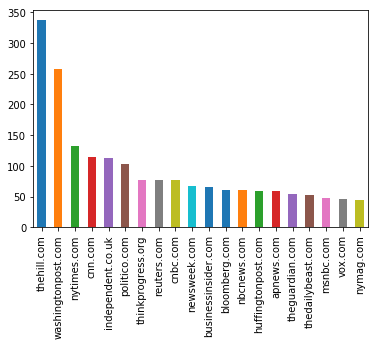

In [64]:
df_pol['domain'].value_counts().head(20).plot(kind='bar')

### NLP

In [24]:
df_pol['text']=df_pol['title'].str.replace('\d+', '')
# df_lib_con.title = df_lib_con.title.str.replace('\d+', '')

In [25]:
df_pol['text'] = [process_lem(text) for text in df_pol['text']]

In [30]:
DD_p= df_pol['domain'].value_counts().head(29).index.tolist()


# df['domain_d'] = [type_ if type_ in News_Comm
#                       else "OTHER" for type_ in df['domain']]
df_pol['domain_d'] = [type_ if type_ in DD_p
                      else "OTHER" for type_ in df_pol['domain']]
print(df_pol['domain_d'].nunique())
print(df['domain_d'].nunique())

30
30


In [31]:
df_pol_t = df_pol[['word_count','sentiment','domain_d','title','post_duration','text']]
# X_n=df[['word_count','sentiment','subjectivity','domain','title','post_duration']]
# y=df_combined['subreddit']
# transform the label 
# y = LabelEncoder().fit_transform(df['subreddit'])
# y_cm = LabelEncoder().fit_transform(df['comments_label'])

In [32]:
df_pol_matrix = tvec.transform(df_pol_t['text'])

In [34]:
df_pol_matrix_df = pd.DataFrame(df_pol_matrix.todense(),
                         columns=tvec.get_feature_names(),
                         index=df_pol_t.index)

In [35]:
df_pol_t = pd.concat([df_pol_matrix_df, df_pol_t.drop('title', axis=1)], axis=1)
# X_test_all = pd.concat([X_test_df, X_test.drop('title', axis=1)], axis=1)

In [37]:
print('Scores')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.score),np.median(df.score)))
print('Number of coments')
print("Mean is {:0.2f} and the Median is {:0.2f}".format(np.mean(df.comms_num),np.median(df.comms_num)))



Scores
Mean is 487.85 and the Median is 147.00
Number of coments
Mean is 79.30 and the Median is 14.00


In [36]:
df_pol_t.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3382 entries, 0 to 3381
Columns: 505 entries, abortion to text
dtypes: float64(502), int64(1), object(2)
memory usage: 13.0+ MB


In [38]:
df_pol_d=pd.get_dummies(df_pol_t, columns=['domain_d'], drop_first=True)

In [40]:
print((df_pol_d.select_dtypes(include=['O']).columns.values))

['text']


In [46]:
X_d.shape

(3842, 34)

In [44]:
df_pol_d.shape

(3382, 532)

In [42]:
df_pol_d=df_pol_d.drop('text',axis=1)

In [56]:
y_hat = lr.predict(df_pol_d)

df_pol['y_hats'] = y_hat

In [57]:
df_pol['pol_id']= le.inverse_transform(df_pol['y_hats'])

/Users/admin/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [ ]:
df_pol.head(3)

In [ ]:
df_pol.pol_id.value_counts()

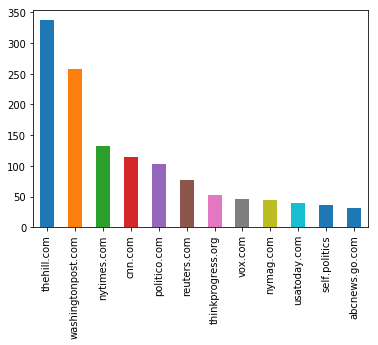

In [58]:
df_pol[df_pol['pol_id']=='Liberal']['domain'].value_counts().head(12).plot(kind='bar');

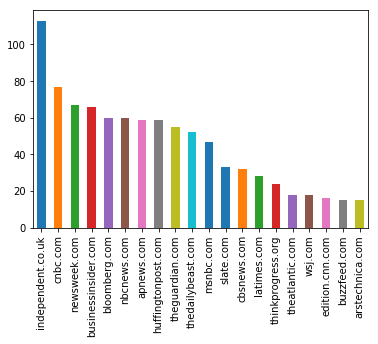

In [61]:
df_pol[df_pol['pol_id']=='Conservative']['domain'].value_counts().head(20).plot(kind='bar');

In [ ]:
df_pol[(df_pol['domain'] == 'nationalreview.com' )]

In [ ]:
df_pol.sample(10)

## FAILURE TO PREDICT

In [62]:
df.to_pickle('r_politic.pickle')